<a href="https://colab.research.google.com/github/Fawzy-AI-Explorer/Disease-Prediction/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modeling for Disease Diagnosis


# Outline:
- [Objective](#goal)
- [Tools (Libraries)](#tools)
- [Exploratory Data Analysis (EDA)](#eda)
  - [Read Data](#load)
  - [Info about Data](#summary)
  - [Target Variable Analysis](#tar_analysis)
  - [Correlation](#fet_corr)
- [Oversampling using **SMOTE**](#smote)
- [Spliting the data](#split)
- [Models](#models)
  - [Losigtic Regression](#lr)
  - [KNN](#knn)  

  - [Random Forest](#rf)
  - [Decision Tree](#dr)  

## <a name="goal">Objective<a>
The objective of this project is to develop a predictive model that can accurately classify individuals into
diseased or non-diseased categories based on their health attributes. By leveraging machine learning
algorithms, we aim to create a reliable tool that healthcare providers can use to assist in disease
diagnosis and prognosis.

## <a name="tools">Tools (Libraries)<a>
In this project, we will make use of:
- pandas, a Python library used for working with data sets
- seaborn, a Python data visualization library based on matplotlib
- Matplotlib, a popular library for plotting data
- sklearn, a simple and efficient tools for predictive data analysis

In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## <a name="eda">Exploratory Data Analysis (EDA)<a>

### <a name="load">Read Data<a>

In [106]:
train_data = pd.read_csv("https://raw.githubusercontent.com/Fawzy-AI-Explorer/Disease-Prediction/main/Train_data.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/Fawzy-AI-Explorer/Disease-Prediction/main/test_data.csv")

### <a name="summary">Info about Data<a>

In [41]:
print(f"The shape of the train data: {train_data.shape}")
print(f"The shape of the test data: {test_data.shape}")


The shape of the train data: (2351, 25)
The shape of the test data: (486, 25)


In [ ]:
data = pd.concat([train_data, test_data], axis=0,  ignore_index=True)

In [42]:
print(f"The shape of the data: {data.shape}")

The shape of the data: (2837, 25)


In [40]:
#First 5 rows of our dataset
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [5]:
#Last 5 rows of our dataset
data.tail()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes
2836,0.877912,0.597809,0.730440,0.462307,0.498438,0.792822,0.976056,0.883937,0.202147,0.930649,...,0.242163,0.783372,0.568568,0.784730,0.500928,0.016738,0.104687,0.055181,0.049341,Diabetes


In [6]:
data.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [7]:
data.isnull().sum().sum()

0

In [33]:
data.skew()

Glucose                                      0.362153
Cholesterol                                  0.263200
Hemoglobin                                  -0.328560
Platelets                                    0.084434
White Blood Cells                           -0.138514
Red Blood Cells                              0.159056
Hematocrit                                  -0.063846
Mean Corpuscular Volume                      0.173812
Mean Corpuscular Hemoglobin                  0.028453
Mean Corpuscular Hemoglobin Concentration   -0.193094
Insulin                                      0.111067
BMI                                         -0.022003
Systolic Blood Pressure                      0.197235
Diastolic Blood Pressure                    -0.071968
Triglycerides                                0.431247
HbA1c                                       -0.000758
LDL Cholesterol                              0.209112
HDL Cholesterol                             -0.034471
ALT                         

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2837.0,0.384621,0.262080,0.001827,0.141529,0.357817,0.596150,0.991742
Cholesterol,2837.0,0.413031,0.251023,0.003088,0.223545,0.397638,0.603341,0.999606
Hemoglobin,2837.0,0.568941,0.278908,0.000719,0.325035,0.597916,0.791215,0.997876
Platelets,2837.0,0.508157,0.301621,0.000006,0.202496,0.533962,0.771727,0.999507
White Blood Cells,2837.0,0.510863,0.279597,-0.000206,0.259467,0.527381,0.744950,0.999646
Red Blood Cells,2837.0,0.506205,0.273070,0.000552,0.258357,0.467431,0.743670,1.000000
Hematocrit,2837.0,0.506106,0.287049,0.004556,0.288132,0.493428,0.753657,1.000857
Mean Corpuscular Volume,2837.0,0.496309,0.276560,0.000309,0.287532,0.461418,0.722293,0.996362
Mean Corpuscular Hemoglobin,2837.0,0.488859,0.310724,-0.000614,0.217207,0.448926,0.778160,0.999234
Mean Corpuscular Hemoglobin Concentration,2837.0,0.551795,0.277234,0.000719,0.319725,0.583470,0.741381,0.999666


In [43]:
numerical_feature = [cols for cols  in data.columns if data.dtypes[cols] != 'O']
numerical_feature

['Glucose',
 'Cholesterol',
 'Hemoglobin',
 'Platelets',
 'White Blood Cells',
 'Red Blood Cells',
 'Hematocrit',
 'Mean Corpuscular Volume',
 'Mean Corpuscular Hemoglobin',
 'Mean Corpuscular Hemoglobin Concentration',
 'Insulin',
 'BMI',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Triglycerides',
 'HbA1c',
 'LDL Cholesterol',
 'HDL Cholesterol',
 'ALT',
 'AST',
 'Heart Rate',
 'Creatinine',
 'Troponin',
 'C-reactive Protein']

In [44]:
data[numerical_feature].head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970


In [11]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<15]
discrete_feature

[]

In [45]:
continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))
data[continuous_feature]

Continuous feature Count 24


,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.763585,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.797147,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.034523,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.366494,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526


### <a name="tar_analysis">Target Variable Analysis<a>

In [46]:
data["Disease"].head()

0     Healthy
1    Diabetes
2    Thalasse
3      Anemia
4    Thalasse
Name: Disease, dtype: object

In [14]:
data["Disease"].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc',
       'Heart Di'], dtype=object)

In [15]:
data["Disease"].value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

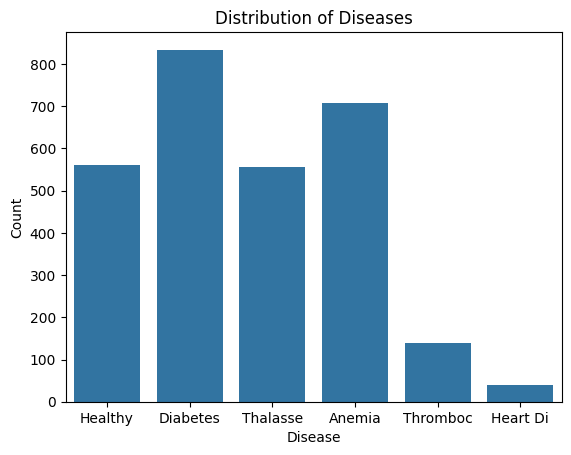

In [16]:

sns.countplot(x='Disease', data=data)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Distribution of Diseases')
plt.show()


In [47]:
data = data.replace({"Disease" : {"Diabetes" : 0, "Anemia" : 1, "Healthy" : 2, "Thalasse" : 3,"Thromboc" :4,"Heart Di" :5}
                     })

In [48]:
data["Disease"].head(10)

0    2
1    0
2    3
3    1
4    3
5    0
6    4
7    4
8    3
9    4
Name: Disease, dtype: int64

### <a name="fet_corr">Correlation<a>

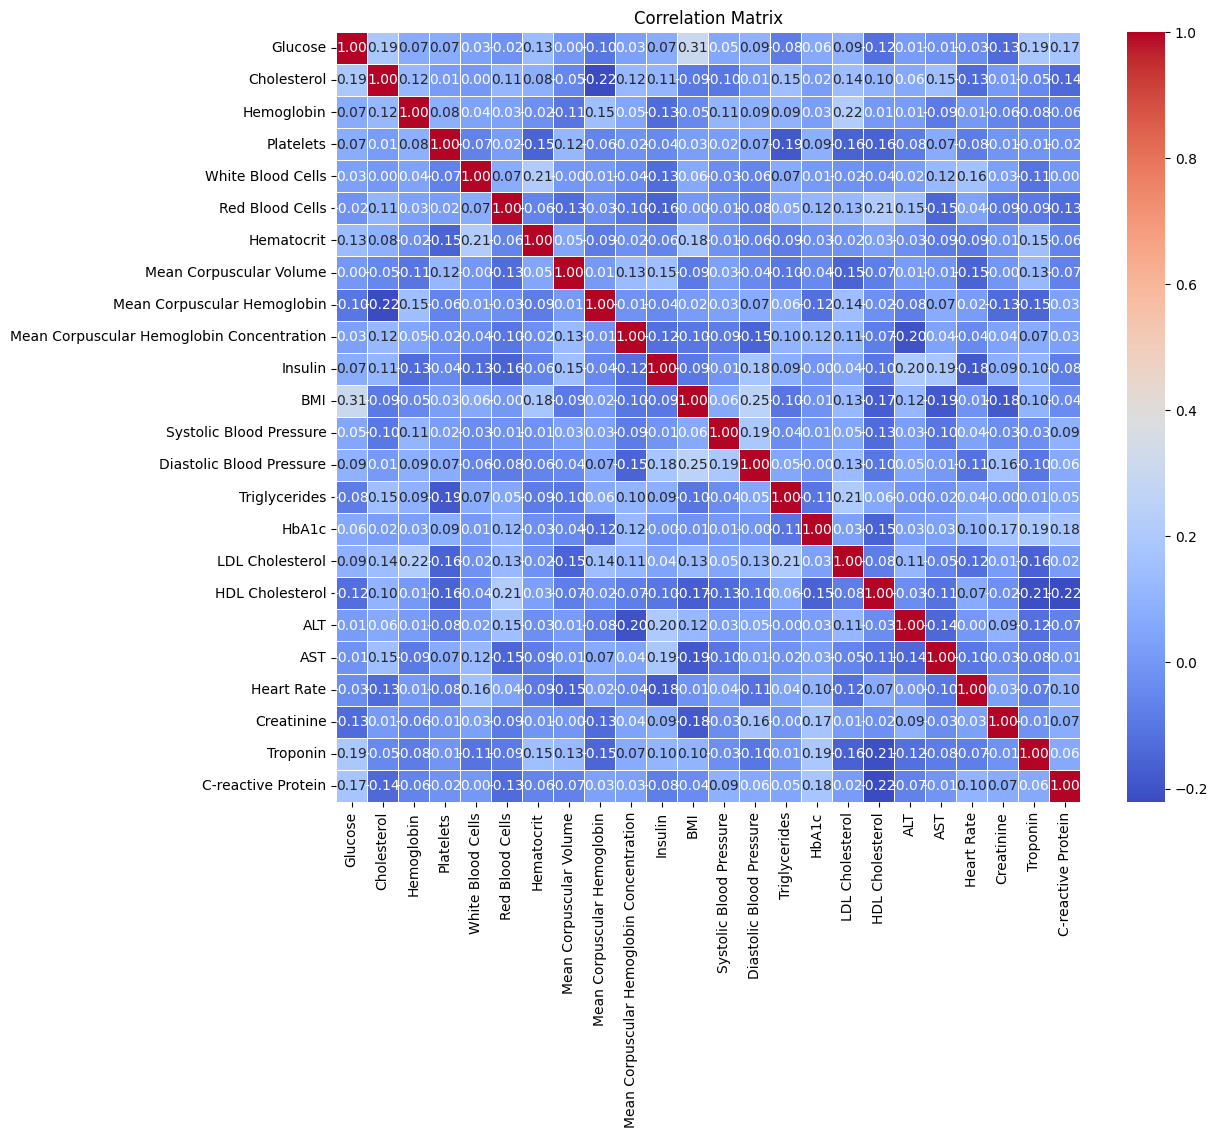

In [52]:
corr_matrix = data[numerical_feature].corr()
# Visualize the correlation matrix using heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidth=0.5)
plt.title('Correlation Matrix')
plt.show()

In [56]:
def high_corr(data,threshold):
    highly_corr = []
    for i in range(len(data.corr().columns)):
        for j in range(i):
            if abs(data.corr().iloc[i,j]) > threshold:
                print(f'({data.corr().columns[i]},{data.corr().columns[j]}) : {data.corr().iloc[i,j]}')
                highly_corr.append((data.corr().columns[i],data.corr().columns[j]))
    return highly_corr

high_corr_list = high_corr(data[numerical_feature],0.5)

## <a name="split">Spliting the data<a>

In [59]:
X = data.drop(['Disease'],axis=1)
y = data['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the train and test Data
print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape)

Training set shape (X, y): (2269, 24) (2269,)
Testing set shape (X, y): (568, 24) (568,)


## <a name="models">Models<a>

### <a name="lr">Losigtic Regression<a>

In [89]:
y_train_ = [0 if value == 2 else 1 for value in y_train]          # (2) is refer to Healthy
y_test_  = [0 if value == 2 else 1 for value in y_test ]          # (2) is refer to Healthy

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train_)

y_train_pred = logistic_reg.predict(X_train)
accuracy = accuracy_score(y_train_, y_train_pred)
print("Accuracy in train:", accuracy)

y_test_pred = logistic_reg.predict(X_test)

accuracy = accuracy_score(y_test_, y_test_pred)
print("Accuracy in test:", accuracy)

print("Classification Report:")
print(classification_report(y_test_, y_test_pred))

Accuracy in train: 0.9171441163508154
Accuracy in test: 0.8996478873239436
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       119
           1       0.91      0.97      0.94       449

    accuracy                           0.90       568
   macro avg       0.88      0.80      0.83       568
weighted avg       0.90      0.90      0.89       568



In [96]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train)

y_train_pred = logistic_reg.predict(X_train)
accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy in train:", accuracy)

y_test_pred = logistic_reg.predict(X_test)

# (0) refer to diseased and (1)  non-diseased.
y_test_         = [0 if value == 2 else 1 for value in y_test]          # (2) is refer to Healthy
y_test_predict_ = [0 if value == 2 else 1 for value in y_test_pred]     # (2) is refer to Healthy

accuracy = accuracy_score(y_test_, y_test_predict_)
print(f"\nAccuracy in test:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test_, y_test_predict_))

Accuracy in train: 0.8223887174966946

Accuracy in test: 0.9295774647887324

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       119
           1       0.94      0.98      0.96       449

    accuracy                           0.93       568
   macro avg       0.91      0.87      0.89       568
weighted avg       0.93      0.93      0.93       568



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy in test:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

Accuracy in test: 0.7975352112676056
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       166
           1       0.85      0.94      0.89       141
           2       0.89      0.76      0.82       119
           3       0.73      0.76      0.75       110
           4       0.91      0.88      0.89        24
           5       0.00      0.00      0.00         8

    accuracy                           0.80       568
   macro avg       0.69      0.68      0.68       568
weighted avg       0.79      0.80      0.79       568



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


the model performs well for most classes, with high precision and recall. <br>
However, it struggles with class 5, where precision, recall, and F1-score are all 0. This indicates that the model fails to correctly predict any instances of class 5 because (Imbalance in the Data).<br>
Diabetes    834 <br>
Anemia      707 <br>
Healthy     561 <br>
Thalasse    557 <br>
Thromboc    139 <br>
Heart Di     39 ---> this is class 5<br>


#### <a name="smote">Oversampling using **SMOTE**<a>

In [116]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [122]:
len(X_train_resampled)

4008

In [123]:
len(y_train_resampled)

4008

<Axes: xlabel='Disease'>

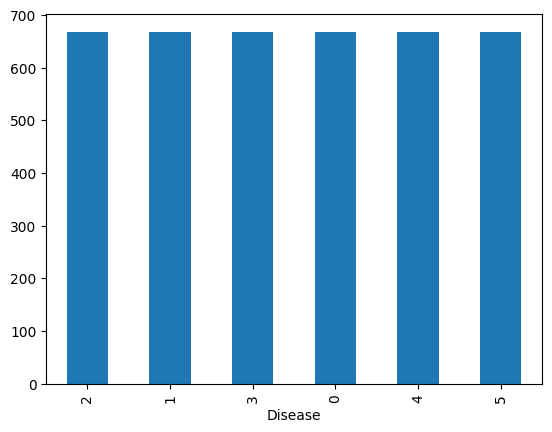

In [121]:
y_train_resampled.value_counts().plot(kind="bar")

In [153]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_resampled, y_train_resampled)

y_train_pred = logistic_reg.predict(X_train_resampled)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy in train:", accuracy)

y_test_pred = logistic_reg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# (0) refer to diseased and (1)  non-diseased.
y_test_         = [0 if value == 2 else 1 for value in y_test]          # (2) is refer to Healthy
y_test_predict_ = [0 if value == 2 else 1 for value in y_test_pred]     # (2) is refer to Healthy
accuracy = accuracy_score(y_test_, y_test_predict_)
print("Accuracy in test:", accuracy)

print("Classification Report:")
print(classification_report(y_test_, y_test_predict_))

Accuracy in train: 0.8680139720558883
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       166
           1       0.86      0.94      0.89       141
           2       0.81      0.85      0.83       119
           3       0.82      0.90      0.86       110
           4       0.81      0.92      0.86        24
           5       0.08      0.12      0.10         8

    accuracy                           0.83       568
   macro avg       0.71      0.74      0.72       568
weighted avg       0.84      0.83      0.83       568

Accuracy in test: 0.9278169014084507
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       119
           1       0.96      0.95      0.95       449

    accuracy                           0.93       568
   macro avg       0.89      0.90      0.89       568
weighted avg       0.93      0.93      0.93       568



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### <a name="knn">KNN<a>

In [152]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_scaled, y_train_resampled)

y_train_pred = knn.predict(X_train_scaled)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy in train:", accuracy)

y_test_pred = knn.predict(X_test_scaled)


print("Classification Report:")
print(classification_report(y_test_pred, y_test))

y_test_         = [0 if value == 2 else 1 for value in y_test]          # (2) is refer to Healthy
y_test_predict_ = [0 if value == 2 else 1 for value in y_test_pred]     # (2) is refer to Healthy
accuracy = accuracy_score(y_test_, y_test_predict_)
print("Accuracy in test:", accuracy)

print("Classification Report:")
print(classification_report(y_test_, y_test_predict_))

Accuracy in train: 0.9121756487025948
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.98      0.82       121
           1       0.92      0.95      0.94       137
           2       1.00      0.86      0.92       139
           3       0.93      0.92      0.92       111
           4       0.88      0.84      0.86        25
           5       0.62      0.14      0.23        35

    accuracy                           0.87       568
   macro avg       0.84      0.78      0.78       568
weighted avg       0.88      0.87      0.86       568

Accuracy in test: 0.9647887323943662
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       119
           1       1.00      0.96      0.98       449

    accuracy                           0.96       568
   macro avg       0.93      0.98      0.95       568
weighted avg       0.97      0.96      0.97       568



### <a name="rf">Random Forest<a>

In [156]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

y_train_pred = rf.predict(X_train_resampled)
accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy in train:", accuracy)


y_test_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy in test:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# (0) refer to diseased and (1)  non-diseased.
y_test_         = [0 if value == 2 else 1 for value in y_test]          # (2) is refer to Healthy
y_test_predict_ = [0 if value == 2 else 1 for value in y_test_pred]     # (2) is refer to Healthy
accuracy = accuracy_score(y_test_, y_test_predict_)
print("Accuracy in test:", accuracy)

print("Classification Report:")
print(classification_report(y_test_, y_test_predict_))

Accuracy in train: 1.0
Accuracy in test: 0.9524647887323944
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       166
           1       1.00      0.92      0.96       141
           2       1.00      0.99      1.00       119
           3       0.99      0.96      0.98       110
           4       1.00      0.83      0.91        24
           5       0.67      0.25      0.36         8

    accuracy                           0.95       568
   macro avg       0.92      0.83      0.86       568
weighted avg       0.96      0.95      0.95       568

Accuracy in test: 0.9982394366197183
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       119
           1       1.00      1.00      1.00       449

    accuracy                           1.00       568
   macro avg       1.00      1.00      1.00       568
weighted avg       1.00      1.00      1.0

### <a name="dr">Decision Tree<a>

In [165]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_resampled, y_train_resampled)

y_train_pred = decision_tree.predict(X_train_resampled)
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy in train:", accuracy_train)

y_test_pred = decision_tree.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print("Accuracy in test:", accuracy_test)

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Convert target labels to binary (0 for diseased, 1 for non-diseased)
y_test_binary = [0 if value == 2 else 1 for value in y_test]
y_test_pred_binary = [0 if value == 2 else 1 for value in y_test_pred]

accuracy_binary = accuracy_score(y_test_binary, y_test_pred_binary)
print("Accuracy in test (binary):", accuracy_binary)
print("Classification Report (binary):")
print(classification_report(y_test_binary, y_test_pred_binary))


Accuracy in train: 1.0
Accuracy in test: 0.9066901408450704
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       166
           1       0.92      0.91      0.92       141
           2       0.94      0.99      0.97       119
           3       0.84      0.93      0.88       110
           4       0.92      0.92      0.92        24
           5       0.33      0.12      0.18         8

    accuracy                           0.91       568
   macro avg       0.81      0.79      0.79       568
weighted avg       0.90      0.91      0.90       568

Accuracy in test (binary): 0.9859154929577465
Classification Report (binary):
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       119
           1       1.00      0.98      0.99       449

    accuracy                           0.99       568
   macro avg       0.97      0.99      0.98       568
weighted avg       0.99 